In [16]:
import os, requests

ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_MY_API_KEY')
ROBOFLOW_WORKSPACE = "nitesh-c-eszzc"
ROBOFLOW_PROJECT = "binsense_bbox_mini"

resp = requests.get(f'https://api.roboflow.com/{ROBOFLOW_WORKSPACE}/{ROBOFLOW_PROJECT}?api_key={ROBOFLOW_API_KEY}')
resp.json()['project']['images']

3089

In [36]:
from binsense.config import BIN_DATA_DIR
from typing import List

# get below details from the browser after signing-in to app.roboflow.com
roboql_url = 'https://app.roboflow.com/query/roboql/dataset'
cookie_string = 'ajs_anonymous_id=e4279315-ae21-40d5-861f-b51169f23e3a; __stripe_mid=a758133a-6f5f-407c-bb09-1b062d1a80699f6794; ajs_user_id=eEYy11ONL8bl5ZlkZHqx7JE1SF92; _cioid=eEYy11ONL8bl5ZlkZHqx7JE1SF92; __cuid=69e19e9bc24c4e23a72f10d840ff2c20; amp_fef1e8=eb7f5880-ecfb-4aa4-bdd2-115ce74ba350R...1hdsm3e31.1hdsm401m.15.o.1t; crisp-client%2Fsession%2F234b80f4-8fae-44e3-be30-be6f98ac8b9c=session_19ee147e-5b56-45da-bccb-c20684a34ddc; cookie_utms={%22host%22:%22blog.roboflow.com%22%2C%22path%22:%22/difference-semantic-segmentation-instance-segmentation/%22%2C%22referrer%22:%22https://www.google.com/%22}; _gcl_au=1.1.674121529.1710332965; _zitok=acdd5307d582a64a181a1711360412; amplitude_idundefinedroboflow.com=eyJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOm51bGwsImxhc3RFdmVudFRpbWUiOm51bGwsImV2ZW50SWQiOjAsImlkZW50aWZ5SWQiOjAsInNlcXVlbmNlTnVtYmVyIjowfQ==; _gid=GA1.2.1573171628.1711715274; crisp-client%2Fsession%2Fd5d3c29f-9108-4cd7-8296-580b989bc9bc=session_fff7980c-9c24-4a2f-819c-a92f5006cca7; __session=eyJhbGciOiJSUzI1NiIsImtpZCI6IkFrZEJodyJ9.eyJpc3MiOiJodHRwczovL3Nlc3Npb24uZmlyZWJhc2UuZ29vZ2xlLmNvbS9yb2JvZmxvdy1wbGF0Zm9ybSIsIm5hbWUiOiJuaXRlc2ggYyIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NKY3RSdUxzMnpMVUVRWGg0RDFTeHEwN0ZUQ1d4QU5GUTNZVC1Fb1Z3V1ZvSVFcdTAwM2RzOTYtYyIsIndvcmtzcGFjZXMiOnsiZUVZeTExT05MOGJsNVpsa1pIcXg3SkUxU0Y5MiI6Im93bmVyIn0sImF1ZCI6InJvYm9mbG93LXBsYXRmb3JtIiwiYXV0aF90aW1lIjoxNzExNzAyMDY2LCJ1c2VyX2lkIjoiZUVZeTExT05MOGJsNVpsa1pIcXg3SkUxU0Y5MiIsInN1YiI6ImVFWXkxMU9OTDhibDVabGtaSHF4N0pFMVNGOTIiLCJpYXQiOjE3MTE3MzE3MzQsImV4cCI6MTcxMjE2MzczNCwiZW1haWwiOiJyZWRkeS5uaXRlc2hAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImZpcmViYXNlIjp7ImlkZW50aXRpZXMiOnsiZ29vZ2xlLmNvbSI6WyIxMDA2NDQ5NDEzNjExNzIzMTExNDkiXSwiZW1haWwiOlsicmVkZHkubml0ZXNoQGdtYWlsLmNvbSJdfSwic2lnbl9pbl9wcm92aWRlciI6Imdvb2dsZS5jb20ifX0.KBr2FV4NdgS-C4Ak79chWXprAAodJ_6NEdapmWdTf-_F9wkLIFVP0ikyL3uDAuSBnl6OFEvZS21a6pfpvqm4kbsx8K3RhZndT1rq_XC2mSK5jmxUWAwN4qqCGU2YWKh1UtjHmSQlPwWjkBgNc92lYlivTxa9A0g9OPaYnIwMYEbXJksBszAPMGepYun3kelGIRtniLcuFHabkC5q5AolV3ItwAmF49HcWazUonpGu12rNCYwzz3_x2nqwyHGr1jifEScjvtS1qSkwdyg8F63rrVd0ioaSRgzpm724KIg8AaAzN6VqhGcxVXivCetDgY_P051x82cTm7RgMnHf51vpA; __stripe_sid=49f80071-3b07-49f7-97f7-e4f99302e2ecc25e8e; _ga=GA1.1.52696650.1697715628; _ga_7RNES0270G=GS1.1.1711798859.36.1.1711798881.0.0.0; amplitude_id_11ee28f1673d40b5f704a83b880a5ddbroboflow.com=eyJkZXZpY2VJZCI6ImYyY2JhZWIyLTI4NjktNGNhMi1iYjc2LWEzNTZlZGFhZDI0NlIiLCJ1c2VySWQiOiJlRVl5MTFPTkw4Ymw1WmxrWkhxeDdKRTFTRjkyIiwib3B0T3V0IjpmYWxzZSwic2Vzc2lvbklkIjoxNzExNzk3NzI0MjM3LCJsYXN0RXZlbnRUaW1lIjoxNzExNzk5NjI2OTY2LCJldmVudElkIjoxMDMzLCJpZGVudGlmeUlkIjoxNTcyLCJzZXF1ZW5jZU51bWJlciI6MjYwNX0=; _ga_SEKT4K1EWR=GS1.1.1711797724.80.1.1711800041.0.0.0'
project_id = 'PedxdvWMh6obbp6GmpGm'
workspace_id = 'eEYy11ONL8bl5ZlkZHqx7JE1SF92'
ann_group = "bins"

def fetch_results(start_index=0, page_size=1):
    resp = requests.post(
        roboql_url,
        headers={'Cookie': cookie_string},
        json={"annotationGroup": ann_group, "pageSize": page_size, "projectId": project_id, "query": " sort:filename", "startingIndex": start_index, "workspaceId": workspace_id}
    )
    return resp.json()

def has_this_tag(this_tags: List[str], user_tags: List[str]):
    for t in this_tags:
        if t in user_tags:
            return 1
    return 0

data = fetch_results()
print('successful=', data['success'])
print('user_tags=', data['aggregations']['user_tags'])
print('timed_out=', data["info"]["timed_out"], 'took=', data["info"]["took"], 'total=', data["info"]["total"])
total = data["info"]["total"]

columns = [ 
    "bin_id", "bin_image", "image_id", 
    "tag", "is_jithu", "is_mythili", 
    "is_nitesh", "is_raghu", "is_adjusted", 
    "is_assumed", "is_blurred", "is_done", "is_hard", 
    "total_count", "item_id", "class_name", "class_count"
]
with open(os.path.join(BIN_DATA_DIR, 'roboflow_metadata.csv'), 'w') as f:
    f.write(','.join(columns))
    f.write("\n")
    
records = []
offset = 0
page_size = 200
while offset < total:
    data = fetch_results(offset, page_size)
    if not data['success']:
        print(f"{offset} is not successful!")
        
    results = data['similarImages']
    for result in results:
        anns = result["annotations"]
        record = [
            result['name'].split('.')[0],
            result["name"],
            result["id"],
            result["split"],
            has_this_tag(['jithu', 'jithu-1'], result['user_tags']),
            has_this_tag(['mythili','mythili-1'], result['user_tags']),
            has_this_tag(['nitesh','nitesh-1'], result['user_tags']),
            has_this_tag(['raghu','raghu-1'], result['user_tags']),
            has_this_tag(['adjusted'], result['user_tags']),
            has_this_tag(['assumed'], result['user_tags']),
            has_this_tag(['blurred', 'blur', 'blurry'], result['user_tags']),
            has_this_tag(['done','Done', 'dome'], result['user_tags']),
            has_this_tag(['hard','hard'], result['user_tags']),
            anns[ann_group]["count"],
            '',
            '',
            0
        ]
        cls_records = []
        for cls, count in anns[ann_group]["classCounts"].items():
            cls_record = record.copy()
            cls_record[14] = cls.split('|')[0]
            cls_record[15] = '"'+cls+'"'
            cls_record[16] = count
            cls_records.append(cls_record)
        records.extend(cls_records)
        offset += 1

with open(os.path.join(BIN_DATA_DIR, 'roboflow_metadata.csv'), 'a') as f:
    for cls_record in records:
        f.write(','.join([str(t) for t in cls_record]))
        f.write('\n')


successful= True
user_tags= {'done': 116, 'jithu': 100, 'mythili': 100, 'nitesh': 100, 'nitesh-1': 100, 'raghu': 100, 'adjusted': 37, 'assumed': 37, 'hard': 35, 'blurred': 18, 'blurry': 1}
timed_out= False took= 3 total= 3080


In [ ]:

from roboflow import Roboflow
api_key = os.environ.get('ROBOFLOW_MY_API_KEY')
rf = Roboflow(api_key=api_key)
project = rf.workspace("nitesh-c-eszzc").project("binsense_bbox_mini")
version = project.version(1)
dataset = version.download("yolov8")


In [24]:
from binsense.config import BIN_DATA_DIR
from typing import List

resp = requests.post(
    f'https://api.roboflow.com/{ROBOFLOW_WORKSPACE}/{ROBOFLOW_PROJECT}/search?api_key={ROBOFLOW_API_KEY}',
    json={"offset": 0, "limit": 1, "fields": ["name"]}
)
total = resp.json()['total']
print(f"{total} image meta-data needs to be downloaded.")
record_count = 0

def is_this_tag(this_tags: List[str], tags: List[str]):
    for this_tag in this_tags:
        if this_tag in tags:
            return 1
    return 0

columns = [ 
    "bin_id", "bin_image", "image_id", 
    "tag", "is_jithu", "is_mythili", 
    "is_nitesh", "is_raghu", "is_adjusted", 
    "is_assumed", "is_blurred", "is_done", "is_hard", 
    "total_count", "item_id", "class_name", "class_count"
]

with open(os.path.join(BIN_DATA_DIR, 'roboflow_metadata.csv'), 'w') as f:
    f.write(','.join(columns))
    f.write("\n")
    while record_count < total:
        firstLoop = False
        query = {
            "offset": record_count,
            "limit": 100,
            "fields": [ "tags", "name", "split" ]
        }
        resp = requests.post(
            f'https://api.roboflow.com/{ROBOFLOW_WORKSPACE}/{ROBOFLOW_PROJECT}/search?api_key={ROBOFLOW_API_KEY}',
            json=query
        )
        n_records = len(resp.json()['results'])
        
        for result in resp.json()['results']:
            l = [
                result['name'].split('.')[0],
                result['name'],
                result['id'],
                result['split'],
                is_this_tag(['jithu', 'jithu-1'], result['tags']),
                is_this_tag(['mythili','mythili-1'], result['tags']),
                is_this_tag(['nitesh','nitesh-1'], result['tags']),
                is_this_tag(['raghu','raghu-1'], result['tags']),
                is_this_tag(['adjusted'], result['tags']),
                is_this_tag(['assumed'], result['tags']),
                is_this_tag(['blurred', 'blur', 'blurry'], result['tags']),
                is_this_tag(['done','Done', 'dome'], result['tags']),
                is_this_tag(['hard','hard'], result['tags']),
                0 # result['annotations']['count']
            ]
            
            if( (not "annotations" in result.keys()) \
                or len(result["annotations"]["classes"]) == 0):
                
                ll = l.copy()
                ll.extend(['', '', 0])
                f.write(','.join([str(t) for t in ll]))
                f.write("\n")
            else:
                for i, cls in enumerate(result["annotations"]["classes"].keys()):
                    count = result["annotations"]["classes"][cls]
                    ll = l.copy()
                    ll.extend([cls.split('|')[0], '"'+cls+'"', count])
                    f.write(','.join([str(t) for t in ll]))
                    f.write("\n")
        record_count += n_records
print(f"{record_count} image meta-data downloaded!")

3080 image meta-data needs to be downloaded.
3080 image meta-data downloaded!


In [72]:
import pandas as pd
from binsense.config import BIN_DATA_DIR

roboflow_df = pd.read_csv(
    os.path.join(BIN_DATA_DIR, 'roboflow_metadata.csv'),
    dtype={'bin_id': str, 'item_id': str}
)
roboflow_df['item_id'] = roboflow_df['item_id'].str.strip()
roboflow_df['bin_id'] = roboflow_df['bin_id'].str.strip()
print(roboflow_df['bin_id'].nunique())
roboflow_df[roboflow_df['bin_id'] == '02959'][["bin_id", "item_id", "class_count"]]

3080


,bin_id,item_id,class_count
739,02959,B00QMTG8BI,1
740,02959,B01GDQLDBO,3
741,02959,B00XXFGE5E,1


In [73]:
from binsense import downloader, metadata

downloader.download()
_, item_df = metadata.load()

train_item_df = pd.read_csv(
    os.path.join(BIN_DATA_DIR, 'train_test_val_split_item.csv'), 
    dtype={'bin_id': str, 'item_id': str})
train_item_df = train_item_df[train_item_df['tag'] != 'test']

train_item_df[train_item_df['bin_id'] == '02959'][["bin_id", "item_id", "item_qty"]]


,bin_id,item_id,item_qty
945,02959,B00QMTG8BI,1
946,02959,B01GDQLDBO,3
947,02959,B00XXFGE5E,1


In [63]:
df1 = roboflow_df[roboflow_df['bin_id'] == '02959']
df2 = train_item_df[train_item_df['bin_id'] == '02959']

df = df1.merge(df2, how="left", on=["bin_id", "item_id"])
df[["bin_id", "item_id", "item_qty", "class_count"]]

,bin_id,item_id,item_qty,class_count
0,02959,B00QMTG8BI,1,1
1,02959,B01GDQLDBO,3,3
2,02959,B00XXFGE5E,1,1


In [103]:
import pandas as pd

def print_compare(rdf, tdf):
    print("roboflow | train_valid_split")
    print(rdf['bin_id'].nunique(), '<=>', tdf['bin_id'].nunique())
    print(rdf['item_id'].nunique(), '<=>', tdf['item_id'].nunique())
    print(rdf.shape[0], '<=>', tdf.shape[0])

# print comparision with uploaded vs downloaded
print_compare(roboflow_df, train_item_df)
print("\n")

print("descrepancies could be due to following reasons -> ")
print("1. all images were uploaded to roboflow due to upload issue.")
print("2. annotators annotated unwanted valid classes as they found in the datasheet, shared with them.")
print("\n")

# clean up the missing bins from roboflow
# this happens because we haven't loaded all bins to roboflow
missing_bins = set(item_df['bin_id'].unique()) - set(roboflow_df['bin_id'].unique())
# print("missing bins", missing_bins)
df = item_df[~item_df.bin_id.isin(missing_bins)]

# check for annotated data having incorrect items and higher counts than required
df1 = df[["bin_id", "item_id", "item_qty"]]
df2 = roboflow_df[["bin_id", "item_id", "class_count"]]
result = pd.merge(left=df1, right=df2, on=["bin_id", "item_id"], how='outer')
print("check for validity of annotated data")
print("#annotations with incorrect items:", result[result['item_qty'].isna()].shape[0])
print("#annotations with higher item quantities:", result[result['item_qty'] < result['class_count']].shape[0])

roboflow | train_valid_split
3080 <=> 3089
2797 <=> 2796
6138 <=> 6177
descrepancies could be due to following reasons -> 
1. all images were uploaded to roboflow due to upload issue.
2. annotators annotated unwanted valid classes as they found in the datasheet shared.


check for validity of annotated data
#annotations with incorrect items 0
#annotations with higher item quantities 0


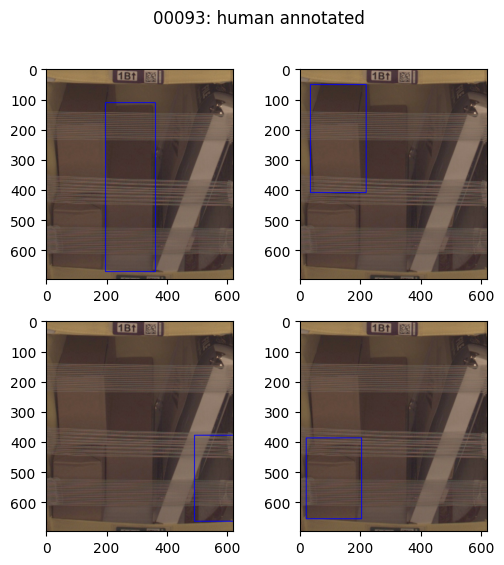

In [1]:
from binsense.plot_utils import show_bbox_ingrid
from binsense.owlv2.utils import center_to_corners_format_numpy
from binsense.config import BIN_S3_DOWNLOAD_IMAGES_DIR as IMG_DIR
import numpy as np
import PIL, os

# downloaded yolov8 format from roboflow for image '00938.jpg'
label_ids = [733, 733, 2110, 733]
label_map = {733: "B004QMRK1K", 2110: "B013JT4D88"}
bboxes = np.array([
    [0.44925925925925925,0.5620114942528736,0.2652012882447665,0.804669540229885],
    [0.20352657004830918,0.3310488505747126,0.2957326892109501,0.5135201149425288],
    [0.8948792270531402,0.7484482758620689,0.21024154589371982,0.4092385057471264],
    [0.1801449275362319,0.7489798850574713,0.295877616747182,0.38548850574712645]
])
img = PIL.Image.open(os.path.join(IMG_DIR, '00938.jpg'))
bboxes[:,[0,2]] = bboxes[:,[0,2]] * img.width
bboxes[:,[1,3]] = bboxes[:,[1,3]] * img.height
bboxes = center_to_corners_format_numpy(bboxes)
show_bbox_ingrid(np.array(img), bboxes, (2, 2), '00093: human annotated')
